# Logistic Regression Exercises

In [143]:
# Import pandas as pd, numpy as np, seaborn as sns, sklearns train_test_split, LogisticRegression, classification_report and confusion_matrix

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report



# Type your code above this line


In [144]:
# Load the dataset into a dataframe

# Location: 'https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease'

df = pd.read_csv('heart_2020_cleaned.csv')
df.info()


# Type your code above this line

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [145]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

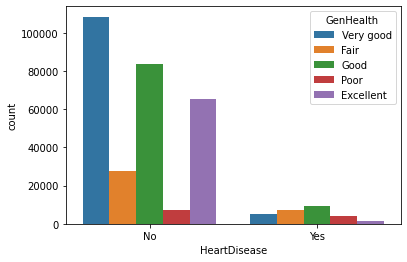

In [150]:
# Data Exploration

# Create a countplot with HeartDisease and compare it against some of the other attributes such as smoking, alcohol, stroke, genhealth, etc


sns.countplot(x='HeartDisease', hue='GenHealth', data=df)




# Type your code above this line

<AxesSubplot:>

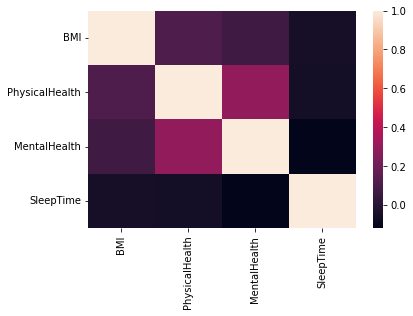

In [151]:
# Create a Heatmap from the correlated dataframe

sns.heatmap(df.corr())


# Type your code above this line

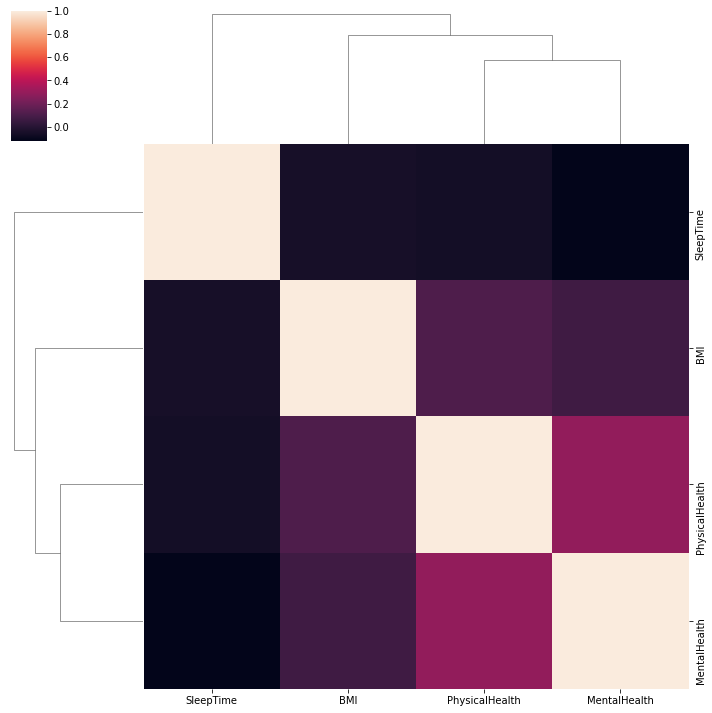

In [152]:
# Create a Clustermap from the correlated dataframe

sns.clustermap(df.corr())

# Type your code above this line

In [156]:
# Column Investigation and Evaluation
# What are the columns that have String categories that we can split (hint: there are quite a few, about 12)
# What are some of the categories beyond Yes/No?
# What about the Age Category column...can we use that?

df['AgeCategory'].value_counts()




# Type your code above this line

65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [181]:
# Split out columns that have String values into numeric values
# rename the column heading and be sure to indicate the correct axis


def change_column_name(orig_name, columns):
    print(orig_name, columns)
    result = {}
    for col in columns:
        result[col] = f'{orig_name}{col}'
    return result

def change_column(col_name):
    print(col_name)
    result = pd.get_dummies(df[col_name], drop_first=True)
    result = result.rename(change_column_name(col_name, result.columns), axis=1)
    return result

# change_column('GenHealth')

# smoking = pd.get_dummies(df['Smoking'], drop_first=True).rename({'Yes':'SmokingCol'}, axis=1)
# smoking

# alcohol = pd.get_dummies(df['AlcoholDrinking'], drop_first=True).rename({'Yes':'AlcoholCol'}, axis=1)
# alcohol

list_of_columns = ['Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer']


columns = [change_column(item) for item in list_of_columns]
columns


# Type your code above this line


Smoking
Smoking Index(['Yes'], dtype='object')
AlcoholDrinking
AlcoholDrinking Index(['Yes'], dtype='object')
Stroke
Stroke Index(['Yes'], dtype='object')
DiffWalking
DiffWalking Index(['Yes'], dtype='object')
Sex
Sex Index(['Male'], dtype='object')
AgeCategory
AgeCategory Index(['25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64',
       '65-69', '70-74', '75-79', '80 or older'],
      dtype='object')
Race
Race Index(['Asian', 'Black', 'Hispanic', 'Other', 'White'], dtype='object')
Diabetic
Diabetic Index(['No, borderline diabetes', 'Yes', 'Yes (during pregnancy)'], dtype='object')
PhysicalActivity
PhysicalActivity Index(['Yes'], dtype='object')
GenHealth
GenHealth Index(['Fair', 'Good', 'Poor', 'Very good'], dtype='object')
Asthma
Asthma Index(['Yes'], dtype='object')
KidneyDisease
KidneyDisease Index(['Yes'], dtype='object')
SkinCancer
SkinCancer Index(['Yes'], dtype='object')


[        SmokingYes
 0                1
 1                0
 2                1
 3                0
 4                0
 ...            ...
 319790           1
 319791           1
 319792           0
 319793           0
 319794           0
 
 [319795 rows x 1 columns],
         AlcoholDrinkingYes
 0                        0
 1                        0
 2                        0
 3                        0
 4                        0
 ...                    ...
 319790                   0
 319791                   0
 319792                   0
 319793                   0
 319794                   0
 
 [319795 rows x 1 columns],
         StrokeYes
 0               0
 1               1
 2               0
 3               0
 4               0
 ...           ...
 319790          0
 319791          0
 319792          0
 319793          0
 319794          0
 
 [319795 rows x 1 columns],
         DiffWalkingYes
 0                    0
 1                    0
 2                    0
 3        

In [182]:
# Concatenate the new columns into the existing DataFrame

for col in columns:
    df = pd.concat([df, col], axis=1)

    
# Type your code above this line

In [184]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,DiabeticYes,DiabeticYes (during pregnancy),PhysicalActivityYes,GenHealthFair,GenHealthGood,GenHealthPoor,GenHealthVery good,AsthmaYes,KidneyDiseaseYes,SkinCancerYes
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,1,0,1,0,0,0,1,1,0,1
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,0,0,1,0,0,0,1,0,0,0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,1,0,1,1,0,0,0,1,0,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,0,0,0,0,1,0,0,0,0,1
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,0,0,1,0,0,0,1,0,0,0


In [185]:
# Drop the original columns that we converted

df = df.drop(['Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer'], axis=1)

# Type your code above this line

In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 38 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   HeartDisease                     319795 non-null  object 
 1   BMI                              319795 non-null  float64
 2   PhysicalHealth                   319795 non-null  float64
 3   MentalHealth                     319795 non-null  float64
 4   SleepTime                        319795 non-null  float64
 5   SmokingYes                       319795 non-null  uint8  
 6   AlcoholDrinkingYes               319795 non-null  uint8  
 7   StrokeYes                        319795 non-null  uint8  
 8   DiffWalkingYes                   319795 non-null  uint8  
 9   SexMale                          319795 non-null  uint8  
 10  AgeCategory25-29                 319795 non-null  uint8  
 11  AgeCategory30-34                 319795 non-null  uint8  
 12  Ag

In [187]:
# Create a dataframe with all the columns other than that 'HeartDisease' data column called 'X'

X = df[df.columns[1:]]
X.info()



# Type your code above this line

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 37 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BMI                              319795 non-null  float64
 1   PhysicalHealth                   319795 non-null  float64
 2   MentalHealth                     319795 non-null  float64
 3   SleepTime                        319795 non-null  float64
 4   SmokingYes                       319795 non-null  uint8  
 5   AlcoholDrinkingYes               319795 non-null  uint8  
 6   StrokeYes                        319795 non-null  uint8  
 7   DiffWalkingYes                   319795 non-null  uint8  
 8   SexMale                          319795 non-null  uint8  
 9   AgeCategory25-29                 319795 non-null  uint8  
 10  AgeCategory30-34                 319795 non-null  uint8  
 11  AgeCategory35-39                 319795 non-null  uint8  
 12  Ag

In [188]:
# Create a dataframe with the 'HeartDisease' column from the dataframe called 'y'

y = df['HeartDisease']
y.info()

# Type your code above this line

<class 'pandas.core.series.Series'>
RangeIndex: 319795 entries, 0 to 319794
Series name: HeartDisease
Non-Null Count   Dtype 
--------------   ----- 
319795 non-null  object
dtypes: object(1)
memory usage: 2.4+ MB


In [189]:
# train_test_split the X and y data and the test_size should be 30%


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



# Type your code above this line

In [192]:
# Instantiate the Logistic Regression model into 'lr'

lr = LogisticRegression(max_iter=1500)


# Type your code above this line

In [193]:
# Fit the model with X_train, y_train
# Note: We might have to alter our max_iter

lr.fit(X_train, y_train)


# Type your code above this line

LogisticRegression(max_iter=1500)

In [194]:
# Run the model prediction on the X_test dataset

predictions = lr.predict(X_test)

# Type your code above this line

In [195]:
predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [198]:
# Take a look at the Confusion Matrix
# Calculate the accuracy, recall, precision and f1-Score for the Positives and Negatives

conf_matrix = confusion_matrix(y_test, predictions)

print(conf_matrix)

box1 = conf_matrix[0][0]
box2 = conf_matrix[0][1]
box3 = conf_matrix[1][0]
box4 = conf_matrix[1][1]


print('Accuracy', (box1 + box4) / (box1 + box2 + box3 + box4)  )


print('\nPositives')
print('Precision', box1 / (box1 + box3))
print('Recall', box1 / (box1 + box2))
print('F1 Score', 2 * box1 / (2 * box1 + box2 + box3))


print('\nNegatives')
print('Precision', box4 / (box4 + box2))
print('Recall', box4 / (box4 + box3))
print('F1 Score', 2 * box4 / (2 * box4 + box2 + box3))





# Type your code above this line

[[86897   752]
 [ 7456   834]]
Accuracy 0.9144456373320548

Positives
Precision 0.9209776053755577
Recall 0.9914203242478522
F1 Score 0.9549015944879726

Negatives
Precision 0.5258511979823455
Recall 0.1006031363088058
F1 Score 0.16889428918590524


In [199]:
# Does the classification_report match your findings?

print(classification_report(y_test, predictions))


# Type your code above this line

              precision    recall  f1-score   support

          No       0.92      0.99      0.95     87649
         Yes       0.53      0.10      0.17      8290

    accuracy                           0.91     95939
   macro avg       0.72      0.55      0.56     95939
weighted avg       0.89      0.91      0.89     95939



In [202]:
# Create a dataframe from the coefficients from the logisitic regression model

coefs = pd.DataFrame(lr.coef_, columns=X.columns)
coefs.transpose()
# Type your code above this line

,0
BMI,0.008966
PhysicalHealth,0.003694
MentalHealth,0.004562
SleepTime,-0.025986
SmokingYes,0.351217
AlcoholDrinkingYes,-0.250641
StrokeYes,1.040286
DiffWalkingYes,0.210583
SexMale,0.720895
AgeCategory25-29,0.060025
